In [1]:
!pip install opencv-contrib-python

   ---------------------------------------- 0.0/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.5 MB 1.4 MB/s eta 0:00:34
   ---------------------------------------- 0.1/45.5 MB 1.3 MB/s eta 0:00:35
   ---------------------------------------- 0.2/45.5 MB 1.9 MB/s eta 0:00:25
   ---------------------------------------- 0.5/45.5 MB 2.6 MB/s eta 0:00:18
    --------------------------------------- 0.8/45.5 MB 3.6 MB/s eta 0:00:13
   - -------------------------------------- 1.2/45.5 MB 4.4 MB/s eta 0:00:11
   - -------------------------------------- 2.2/45.5 MB 6.9 MB/s eta 0:00:07
   -- ------------------------------------- 3.1/45.5 MB 8.7 MB/s eta 0:00:05
   ---- ----------------------------------- 5.1/45.5 MB 12.6 MB/s eta 0:00:04
   ------ --------------------------------- 6.9/45.5 MB 15.2 MB/s eta 0:00:03
   ------ --------------------------------- 6.9/45.5 MB 15.2 MB/s eta 0:00:03
   ------ --------------------------------- 7.5/45.5 MB 15.1 MB/s eta 0:00:03
  

In [2]:
import cv2

In [3]:
img = cv2.imread("albert-einstein_gray.jpg",cv2.IMREAD_GRAYSCALE)

In [4]:
img.shape

(949, 728)

In [5]:
print (cv2.__file__)

D:\Anaconda\Lib\site-packages\cv2\__init__.py


In [46]:
cv2.imshow('Raj',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
clrimg = cv2.imread('tulips.jpg',cv2.COLOR_BGR2RGB)

In [51]:
cv2.imshow('Raj1',clrimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
import matplotlib.pyplot as plt

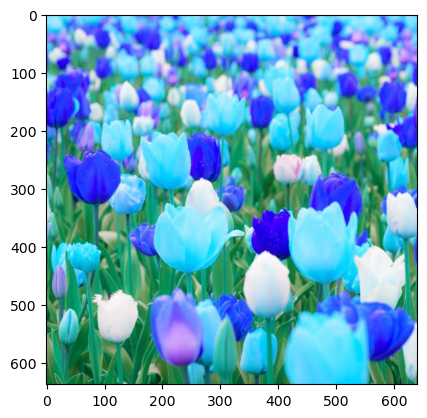

In [45]:
plt.imshow(clrimg)

In [ ]:
#finding hsv range of target object(pen)
import cv2
import numpy as np
import time
# A required callback method that goes into the trackbar function.
def nothing(x):
    pass

# Initializing the webcam feed.
cap = cv2.VideoCapture(0)
cap.set(3,1280)
cap.set(4,720)

# Create a window named trackbars.
cv2.namedWindow("Trackbars")

# Now create 6 trackbars that will control the lower and upper range of 
# H,S and V channels. The Arguments are like this: Name of trackbar, 
# window name, range,callback function. For Hue the range is 0-179 and
# for S,V its 0-255.
cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)
 
while True:
    
    # Start reading the webcam feed frame by frame.
    ret, frame = cap.read()
    if not ret:
        break
    # Flip the frame horizontally (Not required)
    frame = cv2.flip( frame, 1 ) 
    
    # Convert the BGR image to HSV image.
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Get the new values of the trackbar in real time as the user changes 
    # them
    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")
 
    # Set the lower and upper HSV range according to the value selected
    # by the trackbar
    lower_range = np.array([l_h, l_s, l_v])
    upper_range = np.array([u_h, u_s, u_v])
    
    # Filter the image and get the binary mask, where white represents 
    # your target color
    mask = cv2.inRange(hsv, lower_range, upper_range)
 
    # You can also visualize the real part of the target color (Optional)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    # Converting the binary mask to 3 channel image, this is just so 
    # we can stack it with the others
    mask_3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    # stack the mask, orginal frame and the filtered result
    stacked = np.hstack((mask_3,frame,res))
    
    # Show this stacked frame at 40% of the size.
    cv2.imshow('Trackbars',cv2.resize(stacked,None,fx=0.4,fy=0.4))
    
    # If the user presses ESC then exit the program
    key = cv2.waitKey(1)
    if key == 27:
        break
    
    # If the user presses `s` then print this array.
    if key == ord('s'):
        
        thearray = [[l_h,l_s,l_v],[u_h, u_s, u_v]]
        print(thearray)
        
        # Also save this array as penval.npy
        np.save('hsv_value',thearray)
        break
    
# Release the camera & destroy the windows.    
cap.release()
cv2.destroyAllWindows()